In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request

In [3]:
def relu(x):
    relu_x=x
    relu_x[relu_x<0]=0
    return relu_x

def activationFunction(X, V, W):
    A = X@W.T
    Z = relu(A)
    N, H = np.shape(Z)
    Z = np.concatenate((np.ones((N,1)),Z),axis=1)
    O = Z@V.T
    Y = (np.exp(O).T/np.sum(np.exp(O),axis=1)).T
    return Y

Imagen violenta
predict  1  Precision:  99.71 %


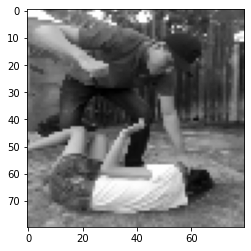

In [4]:
W = np.loadtxt("W")
V = np.loadtxt("V")
imageNew = []
src = cv2.imread("./imagenesNuevas/1.png", cv2.IMREAD_GRAYSCALE)
src = cv2.medianBlur(src,9)
src = cv2.resize(src, (80,80))
src = src/255.
arr = np.array(src)
imageNew.append(arr.ravel())
val_N,d = np.shape(imageNew)
val_X = np.concatenate((np.ones((val_N, 1)), imageNew), axis = 1)
predict = activationFunction(val_X[:,:], V, W)

plt.imshow(np.asarray(np.matrix(imageNew[0])).reshape(80,80),cmap="gray")
prediccion=""
if(np.argmax(predict)==0):
    print("Imagen No violenta")
    
else:
    print("Imagen violenta")
    
Precision = "{0:.2f}".format(max(predict[0])*100) 
print("predict ",np.argmax(predict)," Precision: ",Precision,"%")

In [5]:
predict

array([[0.00293686, 0.99706314]])

Imagen : violenta Precision: 99.99%


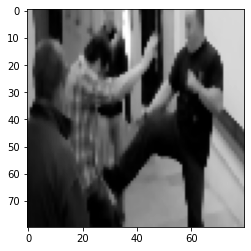

In [7]:
def predecirIMG_URL(url):
    W = np.loadtxt("W")
    V = np.loadtxt("V")
    imageNew = []

    req = urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    r = urllib.request.urlopen(req).read()
    img_array = np.array(bytearray(r), dtype=np.uint8)
    src = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE)

    src = cv2.medianBlur(src,9)
    src = cv2.resize(src, (80,80))
    src = src/255.
    arr = np.array(src)
    imageNew.append(arr.ravel())
    val_N,d = np.shape(imageNew)
    val_X = np.concatenate((np.ones((val_N, 1)), imageNew), axis = 1)
    predict = activationFunction(val_X[:,:], V, W)

    plt.imshow(np.asarray(np.matrix(imageNew[0])).reshape(80,80),cmap="gray")
    prediccion=""
    if(np.argmax(predict)==0):
        #print("Imagen No violenta")
        prediccion="Imagen : No-violenta"
    else:
        #print("Imagen violenta")
        prediccion="Imagen : violenta"

    precision = "{0:.2f}".format(max(predict[0])*100)+"%" 
    prediccion+=" Precision: "+precision
    #print("predict ",np.argmax(predict)," Precision: ",Precision,"%")
    return prediccion

############# Predecir con URl de imagen ##################
result = predecirIMG_URL("https://lh3.googleusercontent.com/proxy/rnV0jtlqD27UJsIhPY-rVqLdaczmfVk8jUYvm-FehBa6JkwaUrGlQTuN8Gmm1ny_ULqckYNkj63akkH00_WL9ujjHXjitoJE5ps9rKDvYtlqrj9SeJ4COA-xDe-YKP0")
print(result)
